## Identificación de tópicos
## Elaborado por TreeData
## Versión Mayo 5 de 2022

In [1]:
# Instalación de módulos necesarios
import os
import re
import numpy as np
from nltk.corpus import stopwords
import pandas as pd
#import spacy
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from pdfminer.high_level import extract_text
from deep_translator import GoogleTranslator
import matplotlib.pyplot as plt 
import gensim
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import warnings
import tqdm
#warnings.filterwarnings("ignore",category=DeprecationWarning)
#Modulo para realizar la nuebe de palabras
#from wordcloud import WordCloud

## Lectura de datos

A continuación tendremos las siguientes funciones claves:

**get_pdf**: Esta función lee los archivos en formato pdf, quita simbolos de páginas web y otros simbolos.

**get_txt**: Esta función lee los archivos en formato txt.

**text_to_eng**: Esta función traduce los documentos del idioma español al inglés. Si desea realizar cambios en el idioma cambie en la función source='es'y target='en' (source es el idioma del documento y target es el idioma al cual se va a traducir) por los correspondientes idiomas. 

**clean_tokenize**: Esta función toma cada documento y le realiza los siguientes procesamientos:

-Convertir en minusculas el texto  
-Eliminar paginas web, signos de puntuación y espacios en blanco  
-Tokenizar el texto  
-Eliminar Stop Words (Si identifica nuevas Stop Words las debe agregar en el archivo 'stop_words.csv') 
-Lematizacion  

Estos resultados estan sujetos al rendimiento de la libreria NLTK, la cual es de las mas potentes para procesamiento de lenguaje natural.

En la línea get_data("C:/Users/jenny/Desktop/Entrega/Archivos/") debe colocar la dirección de la ubicación de la carpeta con los archivos.

In [2]:
def get_pdf(file):
    pdf = extract_text(file)
    text = re.sub('http\S+', ' ', pdf)
    regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~\\“\\º]'
    text = re.sub(regex , ' ', text)
    # Eliminación de números
    text = re.sub("\d+", ' ', text)
    # Eliminación de espacios en blanco múltiples
    text = re.sub("\\s+", ' ', text)
    return text

def get_txt(file):
    with open(file,encoding='utf-8') as f:
        texto = f.read()
    return texto

def text_to_eng(pdf):
    traductor = GoogleTranslator(source='es', target='en')
    n=4999 ## solo traduce 5000 caracteres
    split = [traductor.translate(pdf[i:i+n]) for i in range(0, len(pdf), n)]
    return " ".join(split)

def clean_tokenize(texto):
    '''
    Esta función limpia y tokeniza el texto en palabras individuales.
    El orden en el que se va limpiando el texto no es arbitrario.
    El listado de signos de puntuación se ha obtenido de: print(string.punctuation)
    y re.escape(string.punctuation). La funcion tambien elimina stop words y realiza una
    lematizacion de palablas en español
    '''
    new_stop = pd.read_csv('stop_words.csv')
    # lista de stop words en español
    stop_words = stopwords.words('english')
    stop_words.extend(new_stop['palabra'])
    # Cargando nlp para lematizar
    wnl = WordNetLemmatizer()
    # Se convierte todo el texto a minúsculas
    text = texto.lower()
    # Eliminación de páginas web (palabras que empiezan por "http")
    text = re.sub('http\S+', ' ', text)
    # Eliminación de signos de puntuación
    regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
    text = re.sub(regex , ' ', text)
    # Eliminación de números
    text = re.sub("\d+", ' ', text)
    # Eliminación de espacios en blanco múltiples
    text = re.sub("\\s+", ' ', text)
    # Tokenización por palabras individuales
    #text = text.split(sep = ' ')
    text = word_tokenize(text)
    # Eliminación de tokens con una longitud < 2
    text = [wnl.lemmatize(token) for token in text if len(token) > 1 if not str(token) in stop_words]
    
    return(text)


def get_data(path) -> pd.DataFrame:
    dir_list = os.listdir(path)
    salida = []
    for dir in dir_list:
        print(dir)
        files_dir = os.listdir(path+dir+"/")
        for file in files_dir:
            if file.endswith(".pdf")==True:
                print("procesando " + file)
                texto = get_pdf(path+dir+"/"+file)
            elif file.endswith(".txt")==True:
                print("procesando " + file)
                texto = get_txt(path+dir+"/"+file)
            if dir == "Español":
                print("..traduciendo")
                texto = text_to_eng(texto)
            else: texto 
            salida.append([texto,dir,file])
    df = pd.DataFrame(salida,columns = ['document','idioma','file'] )
    df['clean_text'] = df['document'].apply(clean_tokenize)
    return df



if __name__ == "__main__":
    print("Leyendo, limpiando y preparando data")
    data = get_data("C:/Users/jenny/Desktop/Entrega/Archivos/")
    print("Escribiendo el .csv final")
    #data.to_csv('data_training.csv',encoding="utf-8")
    print("Procesamiento finalizado con exito!")

<>:3: DeprecationWarning: invalid escape sequence \S
<>:7: DeprecationWarning: invalid escape sequence \d
<>:40: DeprecationWarning: invalid escape sequence \S
<>:45: DeprecationWarning: invalid escape sequence \d
<>:3: DeprecationWarning: invalid escape sequence \S
<>:7: DeprecationWarning: invalid escape sequence \d
<>:40: DeprecationWarning: invalid escape sequence \S
<>:45: DeprecationWarning: invalid escape sequence \d
C:\Users\jenny\AppData\Local\Temp/ipykernel_66372/3572534717.py:3: DeprecationWarning: invalid escape sequence \S
  text = re.sub('http\S+', ' ', pdf)
C:\Users\jenny\AppData\Local\Temp/ipykernel_66372/3572534717.py:7: DeprecationWarning: invalid escape sequence \d
  text = re.sub("\d+", ' ', text)
C:\Users\jenny\AppData\Local\Temp/ipykernel_66372/3572534717.py:40: DeprecationWarning: invalid escape sequence \S
  text = re.sub('http\S+', ' ', text)
C:\Users\jenny\AppData\Local\Temp/ipykernel_66372/3572534717.py:45: DeprecationWarning: invalid escape sequence \d
  tex

Leyendo, limpiando y preparando data
Español
procesando 3527-Competitividad-y-Productividad.pdf
..traduciendo
Ingles
procesando Investigacion 1.txt
procesando Investigacion 10.txt
procesando investigacion 11.txt
procesando investigacion 13.txt
procesando Investigacion 14.txt
procesando Investigacion 15.txt
procesando Investigacion 16.txt
procesando Investigacion 17.txt
procesando investigacion 18.txt
procesando investigacion 19.txt
procesando Investigacion 2.txt
procesando investigacion 20.txt
procesando Investigacion 21.txt
procesando Investigacion 22.txt
procesando Investigacion 23.txt
procesando investigacion 24.txt
procesando Investigacion 25.txt
procesando Investigacion 26.txt
procesando Investigacion 27.txt
procesando investigacion 28.txt
procesando Investigacion 29.txt
procesando Investigacion 3.txt
procesando Investigacion 30.txt
procesando Investigacion 31.txt
procesando Investigacion 32.txt
procesando Investigacion 33.txt
procesando Investigacion 34.txt
procesando Investigaci

In [3]:
data

,document,idioma,file,clean_text
0,DDooccuummeennttoo CCoonnppeess National Counc...,Español,3527-Competitividad-y-Productividad.pdf,"[national, council, economic, social, policy, ..."
1,About research on Agrobiodiversity in CIAT\nDe...,Ingles,Investigacion 1.txt,"[agrobiodiversity, delivering, next, generatio..."
2,Tropical Soils Biology Fertility Institute (TS...,Ingles,Investigacion 10.txt,"[tropical, soil, biology, fertility, institute..."
3,The Participatory Research for Development in ...,Ingles,investigacion 11.txt,"[participatory, development, upland, prdu, pro..."
4,Cassava\nUp to 1998 cassava research in LAC wa...,Ingles,investigacion 13.txt,"[cassava, cassava, lac, led, collaboration, na..."
...,...,...,...,...
57,Scientific Fields of Interest: Agriculture.\nM...,Ingles,Investigacion 61.txt,"[scientific, field, interest, agriculture, mai..."
58,Standard crop varieties do not always rise to ...,Ingles,Investigacion 7.txt,"[standard, variety, always, rise, challenge, m..."
59,Big data and mobile technology are widely clai...,Ingles,Investigacion 8.txt,"[big, mobile, technology, widely, claimed, glo..."
60,"Since the time of the last EPMR, five CCERs we...",Ingles,Investigacion 9.txt,"[since, time, last, epmr, five, ccers, conduct..."


**document:** Contiene todo el texto original del documento.  
**idioma:** Identifica el dioma del documento original.  
**file:** Contiene el nombre del archivo que contiene el texto.  
**clean_text:** Contiene el texto limpio y tokenizado, resultante de aplicar la función clean_tokenize.

## Visualización de datos (Nube de palabras) por documento  
En esta sección queremos visualizar las palabras presentes en nuestro documento. Para cambiar de documento seleccione un número desde cero hasta 68 en df['document'][Número de documento].

In [ ]:
# Join the different processed titles together.
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")
    new_stop = pd.read_csv('stop_words.csv')
    # lista de stop words en español
    stop_words = stopwords.words('english')
    stop_words.extend(new_stop['palabra'])
    wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, 
                background_color='salmon', colormap='Pastel1', 
                collocations=False, stopwords = stop_words).generate(df['document'][60]) ## Seleccione aqui documento del 0-68
plot_cloud(wordcloud)

## Iniciando con el modelo LDA
Creamos y reducimos el diccionario filtrando las palabras más raras o demasiado frecuentes. Para ello haremos uso de la función filter_extremes, que nos proporciona el objeto Dictionary y que nos servirá para mantener únicamente aquellos tokens que se encuentran en al menos 2 documentos (no_below) y los que están contenidos en no más del 80% de documentos (no_above).

In [4]:
#Creando el diccionario
dictionary = gensim.corpora.Dictionary(data['clean_text'])
print('Antes de filtrar')
print(dictionary)
dictionary.filter_extremes(no_below=5,no_above=0.8)
print('Despues de filtrar')
print(dictionary)

Antes de filtrar
Dictionary(6949 unique tokens: ['abbreviated', 'ability', 'able', 'abroad', 'absorption']...)
Despues de filtrar
Dictionary(1241 unique tokens: ['ability', 'able', 'absorption', 'access', 'according']...)


Inicializamos el corpus en base al diccionario que acabamos de crear. Cada documento se transformará en una bolsa de palabras (BOW del inglés bag-of-words) con las frecuencias de aparición.

Tras aplicar esta técnica veremos que cada documento está representado como una lista de tuplas donde el primer elemento es el identificador numérico de la palabra y el segundo es el número de veces que esa palabra aparece en el documento.

In [5]:
#Creación del corpus
corpus = [dictionary.doc2bow(text) for text in data['clean_text']]
[[(dictionary[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('ability', 5),
  ('able', 1),
  ('absorption', 2),
  ('access', 40),
  ('according', 5),
  ('account', 13),
  ('achieve', 16),
  ('achievement', 1),
  ('achieving', 3),
  ('action', 71),
  ('active', 3),
  ('actor', 4),
  ('adapt', 3),
  ('adaptation', 1),
  ('addition', 3),
  ('additional', 3),
  ('additionally', 6),
  ('adequate', 4),
  ('administrative', 9),
  ('adopted', 1),
  ('adoption', 1),
  ('advance', 10),
  ('advanced', 6),
  ('advantage', 2),
  ('advice', 1),
  ('advisory', 4),
  ('affect', 1),
  ('affecting', 1),
  ('age', 3),
  ('agency', 1),
  ('agenda', 12),
  ('agent', 5),
  ('agreed', 4),
  ('agreement', 37),
  ('agricultural', 36),
  ('agro', 2),
  ('aim', 2),
  ('aimed', 4),
  ('alliance', 8),
  ('allow', 16),
  ('allowed', 1),
  ('allows', 6),
  ('along', 1),
  ('already', 3),
  ('alternative', 8),
  ('although', 1),
  ('america', 1),
  ('american', 1),
  ('among', 12),
  ('amount', 6),
  ('analysis', 10),
  ('andean', 1),
  ('annual', 20),
  ('another', 1),
  (

## Encontrando el numero óptimo de valores de los parámetros (k, alpha y beta)

La siguiente función es usada para encontrar el número óptimo de parámetros para el modelo,para cada modelo de calcula la perplejidad y coherencia. 

In [9]:
#Función para encontrar los parametros optimos del modelo k, alpha, beta
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data['clean_text'], dictionary=dictionary, coherence='c_v')
    per=lda_model.log_perplexity(corpus)
    return coherence_model_lda.get_coherence(),per

Si desea ampliar la busqueda cambien en las siguientes opciones el valor deseado:  

# Topics range 
min_topics = 2
max_topics = 4
step_size = 1

# Alpha parameter (minimo esta en 0.1 y máximo en 0.5,con salto de 0.1)
alpha = list(np.arange(0.1,0.5, 0.1))

# Beta parameter  (minimo esta en 0.1 y máximo en 0.5, con salto de 0.1)
beta = list(np.arange(0.2, 0.5, 0.1))

In [37]:
grid = {}

# Topics range
min_topics = 2
max_topics = 9
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.1,0.5, 0.1))

# Beta parameter
beta = list(np.arange(0.2, 0.5, 0.1))
#beta.append('symmetric')

model_results = {'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': [],
                 'Perplejidad': []
                }
# iterate through number of topics
for k in topics_range:
# iterate through alpha values
    for a in alpha:
 # iterare through beta values
        for b in beta:
            cv = compute_coherence_values(corpus=corpus, dictionary=dictionary,k=k, a=a, b=b)
            # Save the model results
            model_results['Topics'].append(k)
            model_results['Alpha'].append(a)
            model_results['Beta'].append(b)
            model_results['Coherence'].append(cv[0])
            model_results['Perplejidad'].append(cv[1]) 

In [11]:
#Obteniendo el mejor modelo acorde con la coherencia          
Resultados=pd.DataFrame(model_results)
Resultados[Resultados['Coherence'] == Resultados['Coherence'].max()]

,Topics,Alpha,Beta,Coherence,Perplejidad
18,3,0.3,0.2,0.481389,-6.592478


In [12]:
#Obteniendo el mejor modelo acorde con la Perplejida      
Resultados=pd.DataFrame(model_results)
Resultados[Resultados['Perplejidad'] == Resultados['Perplejidad'].min()]

,Topics,Alpha,Beta,Coherence,Perplejidad
9,2,0.4,0.2,0.393819,-6.679589


In [14]:
Resultados

,Topics,Alpha,Beta,Coherence,Perplejidad
0,2,0.1,0.2,0.393819,-6.679104
1,2,0.1,0.3,0.393819,-6.664925
2,2,0.1,0.4,0.393819,-6.657141
3,2,0.2,0.2,0.393819,-6.679135
4,2,0.2,0.3,0.393819,-6.664966
5,2,0.2,0.4,0.393819,-6.657354
6,2,0.3,0.2,0.393819,-6.679372
7,2,0.3,0.3,0.393819,-6.665207
8,2,0.3,0.4,0.393819,-6.657597
9,2,0.4,0.2,0.393819,-6.679589


In [42]:
Resultados1=pd.DataFrame(model_results)
Resultados1

,Topics,Alpha,Beta,Coherence,Perplejidad
0,2,0.1,0.2,0.393819,-6.679058
1,2,0.1,0.3,0.393819,-6.664790
2,2,0.1,0.4,0.393819,-6.657232
3,2,0.2,0.2,0.393819,-6.679094
4,2,0.2,0.3,0.393819,-6.664966
...,...,...,...,...,...
79,8,0.3,0.3,0.406921,-6.574741
80,8,0.3,0.4,0.408974,-6.565556
81,8,0.4,0.2,0.414388,-6.600619
82,8,0.4,0.3,0.409990,-6.579242


## Gráfico de coherencia para valores especificos de alpha y beta

In [58]:
alpha1=0.4
beta1=0.2
Resultados2=Resultados1[(Resultados1["Alpha"]==alpha1) & (Resultados1["Beta"]==beta1)]
Resultados2

,Topics,Alpha,Beta,Coherence,Perplejidad
9,2,0.4,0.2,0.393819,-6.679589
21,3,0.4,0.2,0.481389,-6.593949
33,4,0.4,0.2,0.426203,-6.665796
45,5,0.4,0.2,0.467551,-6.589045
57,6,0.4,0.2,0.456900,-6.580312
69,7,0.4,0.2,0.466144,-6.587763
81,8,0.4,0.2,0.414388,-6.600619


In [59]:
coherence_values=Resultados2["Coherence"]

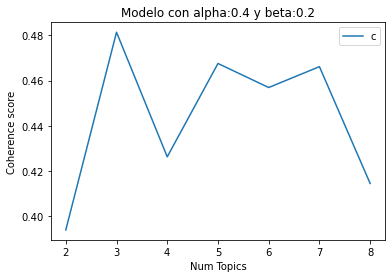

In [60]:
x = Resultados2["Topics"]
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.title("Modelo con alpha:" + str(alpha1) +" y beta:"+ str(beta1))
plt.show()

In [61]:
Perplejidad_values=Resultados2["Perplejidad"]

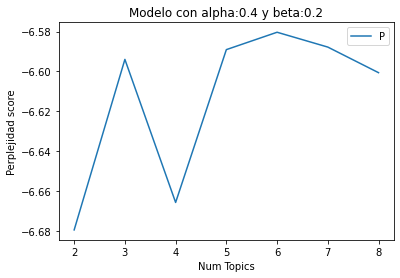

In [63]:
x = Resultados2["Topics"]
plt.plot(x, Perplejidad_values)
plt.xlabel("Num Topics")
plt.ylabel("Perplejidad score")
plt.legend(("Perplejidad_values"), loc='best')
plt.title("Modelo con alpha:" + str(alpha1) +" y beta:"+ str(beta1))
plt.show()

In [64]:
#Modelo LDA con los parámetros seleccionados
k=3
a=0.3
b=0.2
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)

chunksize controla cuántos documentos se procesan a la vez en el algoritmo de entrenamiento. Aumentar el tamaño de los fragmentos acelerará el entrenamiento, al menos mientras el fragmento de documentos quepa fácilmente en la memoria. pass controla la frecuencia con la que entrenamos el modelo en todo el corpus (establecido en 10). Otra palabra para pases podría ser "épocas". iteraciones es algo técnico, pero esencialmente controla la frecuencia con la que repetimos un ciclo particular sobre cada documento. Es importante establecer el número de "pasos" e "iteraciones" lo suficientemente alto.

In [65]:
# Compute Perplexity del modelo seleccionado
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.


Perplexity:  -6.59179751909873


In [66]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=data['clean_text'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.47881703606797904


In [67]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus,dictionary)
vis

C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.035950 -0.095731       1        1  54.508493
0     -0.150052  0.028323       2        1  25.048328
1      0.114102  0.067408       3        1  20.443179, topic_info=            Term        Freq       Total Category  logprob  loglift
909        plant  179.000000  179.000000  Default  30.0000  30.0000
472     national  195.000000  195.000000  Default  29.0000  29.0000
364    indicator  101.000000  101.000000  Default  28.0000  28.0000
733     training  173.000000  173.000000  Default  27.0000  27.0000
226    education   97.000000   97.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
642      service   38.740999  157.045681   Topic3  -5.1368   0.1879
368  information   35.872890  147.733844   Topic3  -5.2137   0.1721
702       system   36.573936  178.107891   Topic3  -5.1943   0.0045
522         plan   35.386949  151.692564   Topic3  -5.2273   0.1320
848         food   34.097729  172.459362   Topic3  -5.2644  -0.0334

[234 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
792       1  0.917855  across
792       2  0.016688  across
792       3  0.066753  across
9         1  0.185221  action
9         2  0.806257  action
...     ...       ...     ...
780       2  0.075976    wood
780       3  0.911715    wood
979       1  0.907144   yield
979       2  0.011781   yield
979       3  0.082468   yield

[441 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])

El control deslizante λ permite clasificar los términos según su relevancia. De forma predeterminada, los términos de un tema se clasifican en orden decreciente según su probabilidad específica del tema ( λ = 1 ). Mover el control deslizante permite ajustar la clasificación de los términos según su grado de discriminación (o "relevancia") para el tema específico. El valor "óptimo" sugerido de λ es 0,6.

El mapa de distancia entre temas es una visualización de los temas en un espacio bidimensional.

El área de estos círculos de temas es proporcional a la cantidad de palabras que pertenecen a cada tema en el diccionario.

El gráfico de barras muestra por defecto los 30 términos más destacados. Las barras indican la frecuencia total del término en todo el corpus.

Salient es una métrica específica, definida en la parte inferior de la visualización, que se puede considerar como una métrica utilizada para identificar las palabras más informativas o útiles para identificar temas en toda la colección de textos.

## La línea a continuación nos muestra la composicióin de cada tópico y para cada uno muestra las 10 principales palabras

In [68]:
topicos = lda_model.print_topics(num_words=10, num_topics=k)
for topico in topicos:
    print(topico)

(0, '0.017*"national" + 0.013*"plan" + 0.012*"program" + 0.012*"indicator" + 0.012*"training" + 0.011*"education" + 0.011*"policy" + 0.010*"sector" + 0.009*"action" + 0.009*"business"')
(1, '0.015*"plant" + 0.012*"main" + 0.011*"technology" + 0.011*"science" + 0.011*"training" + 0.010*"management" + 0.010*"soil" + 0.009*"analysis" + 0.008*"agricultural" + 0.008*"production"')
(2, '0.010*"farmer" + 0.008*"food" + 0.007*"climate" + 0.007*"international" + 0.006*"system" + 0.006*"agricultural" + 0.006*"technology" + 0.006*"country" + 0.006*"change" + 0.006*"bean"')


## Nube de palabras para cada tópico

In [ ]:
for i in range(0, k):
    plt.figure(figsize=(10,10))
    plt.imshow(WordCloud(background_color='white', prefer_horizontal=1.0)
               .fit_words(dict(lda_model.show_topic(i, 30))))
    plt.axis("off")
    plt.title("Tópico " + str(i+1))
    plt.show()

## Distribución de los tópicos en el documento

In [72]:
#Especifique en d el número de documento para el cual desea hacer la distribución de los tópicos
d=20
bow_noticia = corpus[d]
# Indices de los topicos mas significativos
dist_indices = [topico[0] for topico in lda_model[bow_noticia]]
# Contribución de los topicos mas significativos
dist_contrib = [topico[1] for topico in lda_model[bow_noticia]]

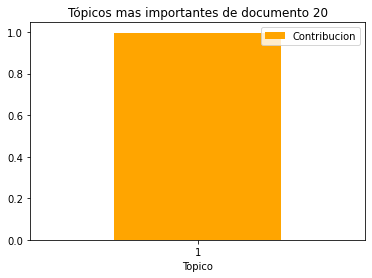

In [73]:
distribucion_topicos = pd.DataFrame({'Topico':dist_indices,
                                     'Contribucion':dist_contrib })
distribucion_topicos.sort_values('Contribucion', 
                                 ascending=False, inplace=True)
ax = distribucion_topicos.plot.bar(y='Contribucion',x='Topico', 
                                   rot=0, color="orange",
                                   title = 'Tópicos mas importantes'
                                   ' de documento ' + str(d))

## Tópico más representativo por documento

In [74]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


In [84]:
df_topic_sents_keywords=format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data["file"])

In [91]:
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(15)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.9999,"national, plan, program, indicator, training, ...",3527-Competitividad-y-Productividad.pdf
1,1,2.0,0.9995,"farmer, food, climate, international, system, ...",Investigacion 1.txt
2,2,2.0,0.9846,"farmer, food, climate, international, system, ...",Investigacion 10.txt
3,3,2.0,0.9093,"farmer, food, climate, international, system, ...",investigacion 11.txt
4,4,2.0,0.9581,"farmer, food, climate, international, system, ...",investigacion 13.txt
5,5,2.0,0.9875,"farmer, food, climate, international, system, ...",Investigacion 14.txt
6,6,2.0,0.8292,"farmer, food, climate, international, system, ...",Investigacion 15.txt
7,7,2.0,0.7929,"farmer, food, climate, international, system, ...",Investigacion 16.txt
8,8,2.0,0.8859,"farmer, food, climate, international, system, ...",Investigacion 17.txt
9,9,2.0,0.9824,"farmer, food, climate, international, system, ...",investigacion 18.txt


## El documento más representativo de cada tópico

In [92]:
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

In [94]:
for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

In [95]:
# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

In [96]:
# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.9999,"national, plan, program, indicator, training, ...",3527-Competitividad-y-Productividad.pdf
1,1.0,0.9985,"plant, main, technology, science, training, ma...",Investigacion 26.txt
2,2.0,0.9997,"farmer, food, climate, international, system, ...",investigacion 20.txt


## Distribución de los tópicos en los documentos

In [98]:
# Número de documentos para cada tópico
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

In [101]:
# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)
topic_contribution

1.0    0.6290
2.0    0.3548
0.0    0.0161
Name: Dominant_Topic, dtype: float64